In [23]:
# Importing Necessary libraries

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
columns = [
    "Overall Qual",
    "Overall Cond",
    "Gr Liv Area",
    "Central Air",
    "Total Bsmt SF",
    "SalePrice",
    "Fireplaces",
    "Exter Qual",
]


df = pd.read_csv(
    "http://jse.amstat.org/v19n3/decock/AmesHousing.txt", sep="\t", usecols=columns
)

df.head()

,Overall Qual,Overall Cond,Exter Qual,Total Bsmt SF,Central Air,Gr Liv Area,Fireplaces,SalePrice
0,6,5,TA,1080.0,Y,1656,2,215000
1,5,6,TA,882.0,Y,896,0,105000
2,6,6,TA,1329.0,Y,1329,0,172000
3,7,5,Gd,2110.0,Y,2110,2,244000
4,5,5,TA,928.0,Y,1629,1,189900


In [3]:
df["Central Air"] = df["Central Air"].map({"Y": 1, "N": 0})

df.isnull().sum()

Overall Qual     0
Overall Cond     0
Exter Qual       0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
Fireplaces       0
SalePrice        0
dtype: int64

In [4]:
df = df.dropna(axis=0)
print(df.isnull().sum())
print(df["Exter Qual"].unique())
df["Exter Qual"] = df["Exter Qual"].map({"TA": 1, "Gd": 2, "Ex": 3, "Fa": 4})
print(df["Exter Qual"].unique())

Overall Qual     0
Overall Cond     0
Exter Qual       0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
Fireplaces       0
SalePrice        0
dtype: int64
['TA' 'Gd' 'Ex' 'Fa']
[1 2 3 4]


In [7]:
# Train Test split
target = "SalePrice"
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

# Create a dictionary for model statistics and use the function to add to it

mod_stats = {}


def reg_mod(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
    x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

    ax1.scatter(
        y_test_pred,
        y_test_pred - y_test,
        c="limegreen",
        marker="s",
        edgecolor="white",
        label="Test data",
    )
    ax2.scatter(
        y_train_pred,
        y_train_pred - y_train,
        c="steelblue",
        marker="o",
        edgecolor="white",
        label="Training data",
    )
    ax1.set_ylabel("Residuals")

    for ax in (ax1, ax2):
        ax.set_xlabel("Predicted values")
        ax.legend(loc="upper left")
        ax.hlines(y=0, xmin=x_min - 100, xmax=x_max + 100, color="black", lw=2)

    plt.tight_layout()

    # plt.savefig('figures/09_11.png', dpi=300)
    plt.show()

    # RMSE

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"RMSE train: {rmse_train:.2f}")
    print(f"RMSE test: {rmse_test:.2f}")

    # MAE

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE train: {mae_train:.2f}")
    print(f"MAE test: {mae_test:.2f}")

    # R^2

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"R^2 train: {r2_train:.2f}")
    print(f"R^2 test: {r2_test:.2f}")

    model_key = f"{model.__class__.__name__}"

    mod_stats[model_key] = {
        "rmse": round(rmse_test, 3),
        "mae": round(mae_test, 3),
        "r2": round(r2_test, 3),
    }

    return

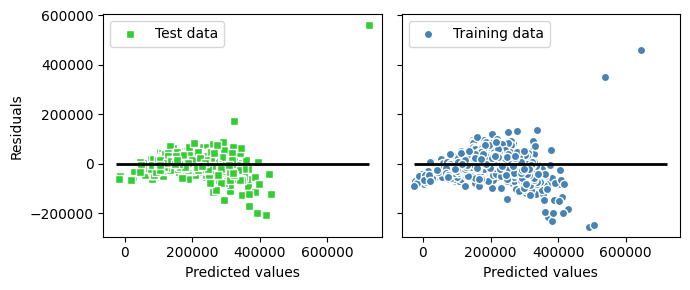

RMSE train: 36949.63
RMSE test: 37879.38
MAE train: 24934.35
MAE test: 24473.56
R^2 train: 0.79
R^2 test: 0.76


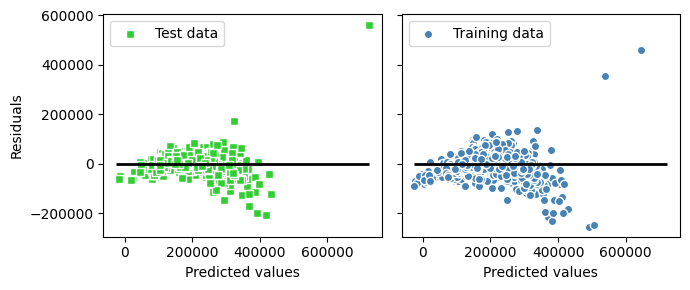

RMSE train: 36949.64
RMSE test: 37880.41
MAE train: 24933.36
MAE test: 24471.77
R^2 train: 0.79
R^2 test: 0.76


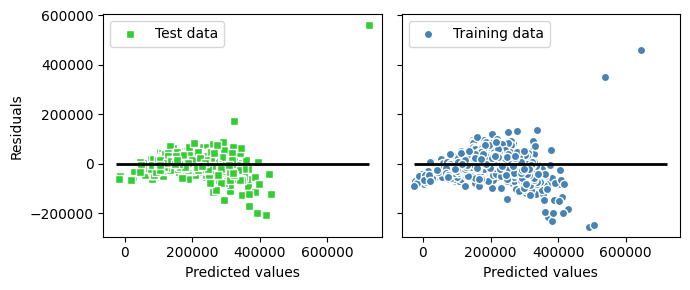

RMSE train: 36949.63
RMSE test: 37879.46
MAE train: 24934.26
MAE test: 24473.34
R^2 train: 0.79
R^2 test: 0.76


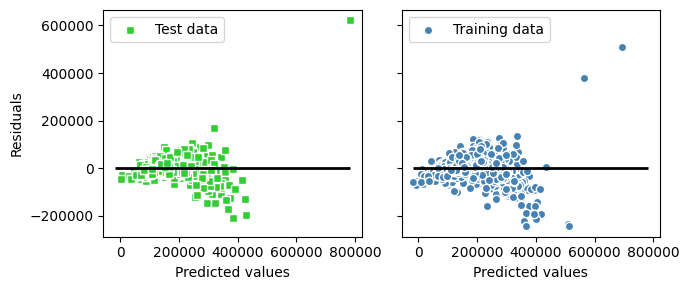

RMSE train: 38436.32
RMSE test: 39836.49
MAE train: 25068.47
MAE test: 24612.05
R^2 train: 0.77
R^2 test: 0.74


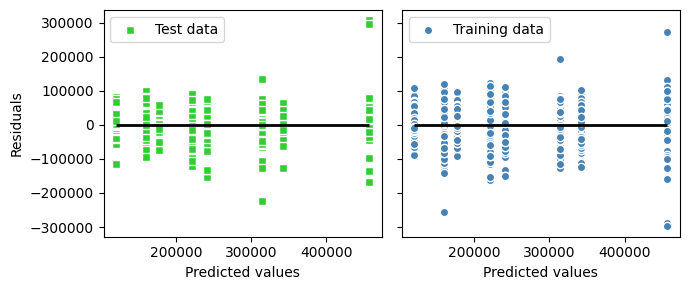

RMSE train: 41489.68
RMSE test: 40298.50
MAE train: 30303.59
MAE test: 29020.67
R^2 train: 0.73
R^2 test: 0.73


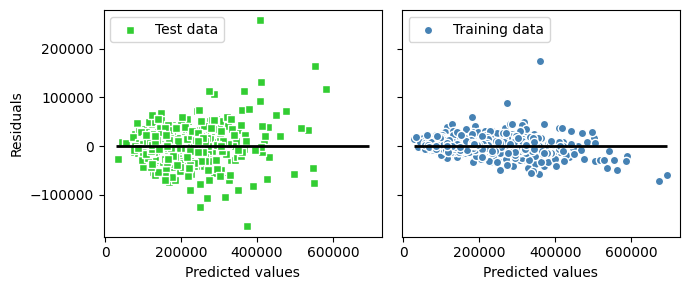

RMSE train: 11780.57
RMSE test: 29256.11
MAE train: 7767.02
MAE test: 19952.25
R^2 train: 0.98
R^2 test: 0.86


In [8]:
# Simple Linear Regression

forest = RandomForestRegressor(
    n_estimators=1000, criterion="squared_error", random_state=1, n_jobs=1
)

slr = LinearRegression()

# Ridge
ridge = Ridge(alpha=1.0)

# Lasso
lasso = Lasso(alpha=1.0)

# ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Decision Tree
tree = DecisionTreeRegressor(max_depth=3)

reg_mod(slr)
reg_mod(ridge)
reg_mod(lasso)
reg_mod(elanet)
reg_mod(tree)
reg_mod(forest)

In [9]:
mod_stats

{'LinearRegression': {'rmse': 37879.384, 'mae': 24473.559, 'r2': 0.765},
 'Ridge': {'rmse': 37880.413, 'mae': 24471.769, 'r2': 0.765},
 'Lasso': {'rmse': 37879.46, 'mae': 24473.342, 'r2': 0.765},
 'ElasticNet': {'rmse': 39836.487, 'mae': 24612.049, 'r2': 0.74},
 'DecisionTreeRegressor': {'rmse': 40298.502, 'mae': 29020.665, 'r2': 0.734},
 'RandomForestRegressor': {'rmse': 29256.112, 'mae': 19952.25, 'r2': 0.86}}

In [ ]:
# Forest Regression

forest = RandomForestRegressor(random_state=1)

params = {"n_estimators": [500, 1000], 
          "criterion": ["squared_error", "absolute_error"],
          "max_depth": [1, 3, 5, 7],
          "min_samples_split" : [2,4], 
          "min_samples_leaf" :[1,2,3], 
          "min_weight_fraction_leaf":[0.0], 
          "max_features":[1.0], 
          "max_leaf_nodes":[None], 
          "min_impurity_decrease":[0.0]}

clf = GridSearchCV(forest, params, cv=5) #default is 5 anyways
clf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 3, 5, 7], 'max_features': [1.0],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [500, 1000]})

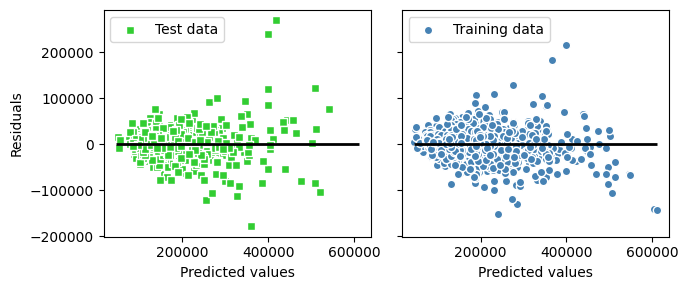

RMSE train: 24549.79
RMSE test: 29404.56
MAE train: 16771.05
MAE test: 19505.44
R^2 train: 0.91
R^2 test: 0.86


In [32]:
best_forest = clf.best_estimator_
reg_mod(best_forest)

In [33]:
mod_stats

{'LinearRegression': {'rmse': 37879.384, 'mae': 24473.559, 'r2': 0.765},
 'Ridge': {'rmse': 37880.413, 'mae': 24471.769, 'r2': 0.765},
 'Lasso': {'rmse': 37879.46, 'mae': 24473.342, 'r2': 0.765},
 'ElasticNet': {'rmse': 39836.487, 'mae': 24612.049, 'r2': 0.74},
 'DecisionTreeRegressor': {'rmse': 40298.502, 'mae': 29020.665, 'r2': 0.734},
 'RandomForestRegressor': {'rmse': 29404.559, 'mae': 19505.436, 'r2': 0.858}}

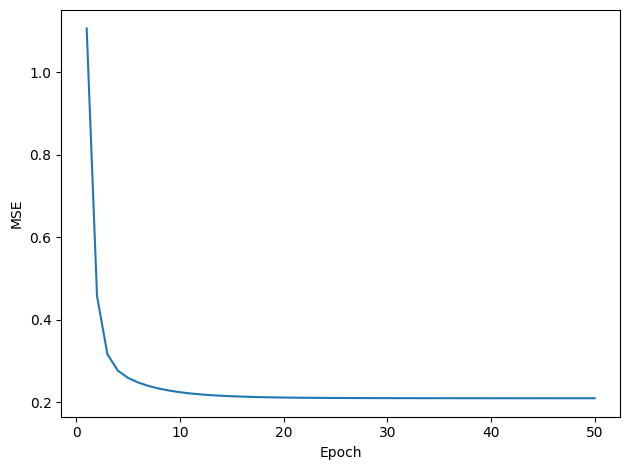

In [10]:
class LinearRegressionGD:
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=x.shape[1])
        self.b_ = np.array([0.0])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(x)
            errors = y - output
            self.w_ += self.eta * 2.0 * x.T.dot(errors) / x.shape[0]
            self.b_ = self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        return self.net_input(x)

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X_train)
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter + 1), lr.losses_)
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.tight_layout()
plt.show()

In [22]:
X_test_std = sc_x.transform(X_test)
y_test_pred_std = lr.predict(X_test_std)
y_pred = sc_y.inverse_transform(y_test_pred_std.reshape(-1,1))

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R^2: {r2_score(y_test, y_pred):.2f}")

MAE: 24476.56
RMSE: 37847.24
R^2: 0.77


/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/1k/3mrcqp5d4670v77qsx12xwmm0000gn/T/ipykernel_77979/177138058.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


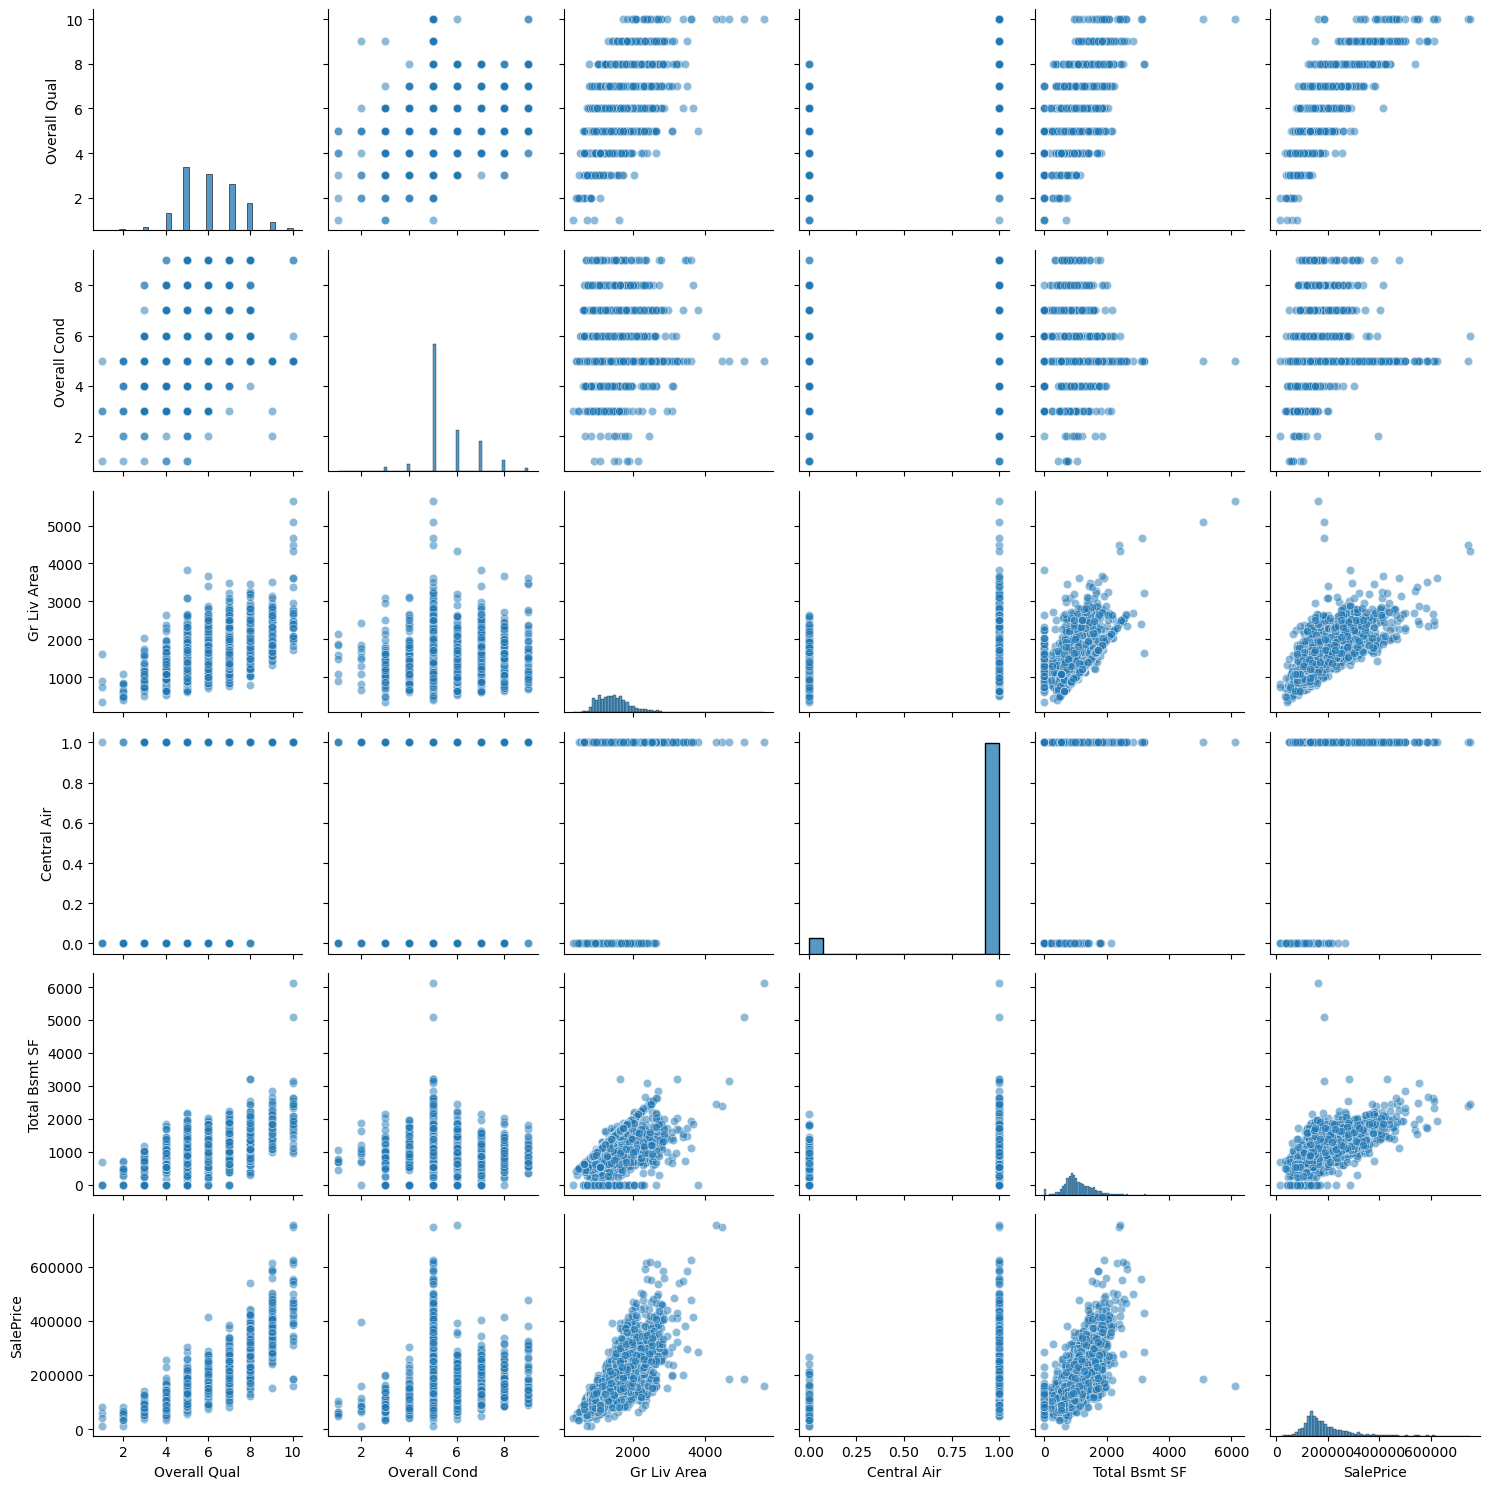

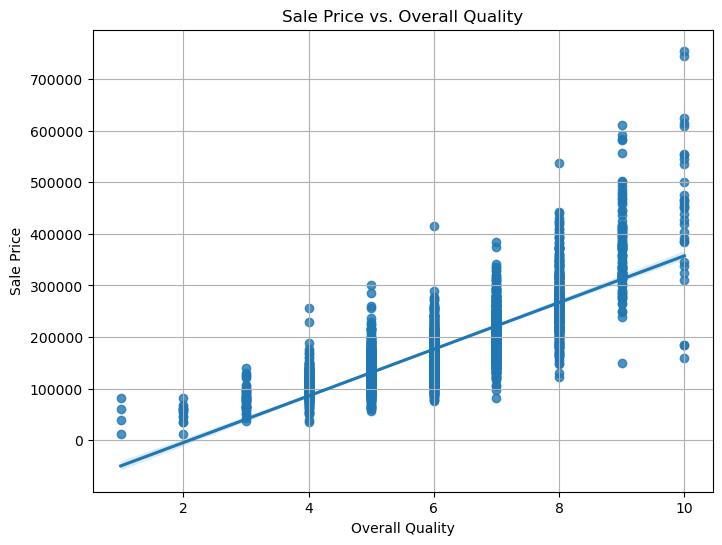

In [6]:
X_cols = ["Overall Qual", "Overall Cond", "Gr Liv Area", "Central Air", "Total Bsmt SF"]
y_col = "SalePrice"

# Select the columns of interest
cols_of_interest = X_cols + [y_col]

# Create the pairplot
sns.pairplot(
    df[cols_of_interest], diag_kind="hist", plot_kws={"alpha": 0.5}, height=2.5
)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x="Overall Qual", y="SalePrice", data=df, scatter=True, fit_reg=True)
plt.title("Sale Price vs. Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.grid(True)
plt.show()